In [ ]:
!pip install MTCNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from mtcnn.mtcnn import MTCNN
import urllib.request
import requests
import threading
import random
import csv
import os
import datetime
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense , Flatten ,GlobalAveragePooling2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def prep1(path):
    folders = os.listdir(path)
    images = []
    labels = []
    l=0
    dc = 0
    cc =0
    num = 327
    for fold in folders:
        fold_path = path + "/" + fold
        if fold == 'nm' and cc<num :
            l = 0
            for files in os.listdir(fold_path):
              if cc<num:
                file_path = fold_path + "/" + files
                image = load_img(file_path, target_size=(224, 224))
                image = img_to_array(image)
                #image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
                image = preprocess_input(image)
                images.append(image)
                labels.append(l)
                cc=cc+1
                print("cc:",cc)

        elif fold == 'm' and dc<num:
            l = 1
            for files in os.listdir(fold_path):
              if dc<num:
                file_path = fold_path + "/" + files
                image = load_img(file_path, target_size=(224, 224))
                image = img_to_array(image)
                #image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
                image = preprocess_input(image)
                images.append(image)
                labels.append(l)
                dc=dc+1
                print("dc:",dc)
        elif dc>num and cc>num:
          break

    return images,labels
train_im , train_lb = prep1("/content/drive/My Drive/iotfm/train")
test_im , test_lb = prep1("/content/drive/My Drive/iotfm/test")

cc: 1
cc: 2
cc: 3
cc: 4
cc: 5
cc: 6
cc: 7
cc: 8
cc: 9
cc: 10
cc: 11
cc: 12
cc: 13
cc: 14
cc: 15
cc: 16
cc: 17
cc: 18
cc: 19
cc: 20
cc: 21
cc: 22
cc: 23
cc: 24
cc: 25
cc: 26
cc: 27
cc: 28
cc: 29
cc: 30
cc: 31
cc: 32
cc: 33
cc: 34
cc: 35
cc: 36
cc: 37
cc: 38
cc: 39
cc: 40
cc: 41
cc: 42
cc: 43
cc: 44
cc: 45
cc: 46
cc: 47
cc: 48
cc: 49
cc: 50
cc: 51
cc: 52
cc: 53
cc: 54
cc: 55
cc: 56
cc: 57
cc: 58
cc: 59
cc: 60
cc: 61
cc: 62
cc: 63
cc: 64
cc: 65
cc: 66
cc: 67
cc: 68
cc: 69
cc: 70
cc: 71
cc: 72
cc: 73
cc: 74
cc: 75
cc: 76
cc: 77
cc: 78
cc: 79
cc: 80
cc: 81
cc: 82
cc: 83
cc: 84
cc: 85
cc: 86
cc: 87
cc: 88
cc: 89
cc: 90
cc: 91
cc: 92
cc: 93
cc: 94
cc: 95
cc: 96
cc: 97
cc: 98
cc: 99
cc: 100
cc: 101
cc: 102
cc: 103
cc: 104
cc: 105
cc: 106
cc: 107
cc: 108
cc: 109
cc: 110
cc: 111
cc: 112
cc: 113
cc: 114
cc: 115
cc: 116
cc: 117
cc: 118
cc: 119
cc: 120
cc: 121
cc: 122
cc: 123
cc: 124
cc: 125
cc: 126
cc: 127
cc: 128
cc: 129
cc: 130
cc: 131
cc: 132
cc: 133
cc: 134
cc: 135
cc: 136
cc: 137
cc: 138
cc: 

In [ ]:
model1 = VGG16(weights='imagenet',include_top = False)
x = model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation = tf.nn.relu)(x)
x = Dense(128,activation = tf.nn.relu)(x)
op = Dense(2,activation = tf.nn.softmax)(x)
model = Model( inputs = model1.input ,outputs = op)
for layer in model1.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow import keras
class callbacks(keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if logs.get('accuracy') > 0.95:
      print("\n Accuracy reached \n")
      self.model.stop_training = True
callbacks = callbacks()

In [ ]:
train_im = np.array(train_im)
train_lb = np.array(train_lb)

test_im = np.array(test_im)
test_lb = np.array(test_lb)

test_im.shape

(84, 224, 224, 3)

In [ ]:
train_lb.shape

(654,)

In [ ]:
h = model.fit(train_im,train_lb,epochs=100,shuffle=True,callbacks = callbacks)

Epoch 1/100
21/21 [==============================] - 9s 213ms/step - loss: 0.2256 - accuracy: 0.9465
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9985
 Accuracy reached 

21/21 [==============================] - 3s 145ms/step - loss: 0.0044 - accuracy: 0.9985


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
def face_det_ext(img):
    face_det = MTCNN()
    faces = face_det.detect_faces(img)
    co = list(faces[0]['box'])
    x1 , y1 , x2 , y2 = co[0] , co[1] , co[0]+co[2] , co[1]+co[3]
    cp = img[y1:y2,x1:x2]
    #cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),3)
    return [cp,[x1,y1,x2,y2]]
def thingspeak_post(valm):
    #threading.Timer(15,thingspeak_post).start()
    val= "x"+valm
    URl='https://api.thingspeak.com/update?api_key='
    KEY='WXR2TPCQBGH7ZWE4'
    HEADER='&field1={}'.format(val)
    NEW_URL = URl+KEY+HEADER
    print(NEW_URL)
    data=urllib.request.urlopen(NEW_URL)
    print(data)

<IPython.core.display.Javascript object>

No mask
https://api.thingspeak.com/update?api_key=WXR2TPCQBGH7ZWE4&field1=xn


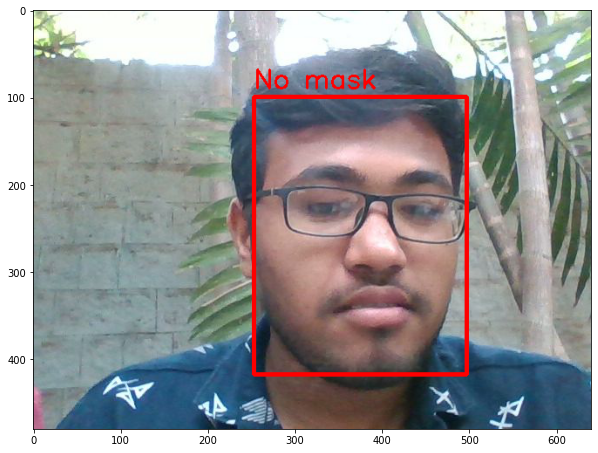

In [ ]:
clas = ['No mask','Mask']
filename = take_photo()
image = plt.imread(filename)
fimg = image.copy()
image , co = face_det_ext(image)
x1 , y1 , x2 , y2 = co[0] , co[1] , co[2] , co[3]
image = cv2.resize(image,(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
pred = model.predict(image)
p = clas[np.argmax(pred)]
print(p)
if p=='No mask':
  cv2.putText(fimg,"No mask", (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX,1,(2555,0,0),2)
  cv2.rectangle(fimg,(x1,y1),(x2,y2),(255,0,0),3)
  val = "n"
else:
  cv2.putText(fimg,"Mask", (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
  cv2.rectangle(fimg,(x1,y1),(x2,y2),(0,255,0),3)
  val = "m"
plt.figure(figsize=(10,10))
plt.imshow(fimg)
thingspeak_post(val)
